In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
df = pd.read_csv("env_ML/data base/4910797b-ee55-40a7-8668-10efd5c1b960.csv")
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [41]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [42]:
from pathlib import Path
import pandas as pd

In [43]:
 # unimos features and labeld on "id"

In [44]:
base = Path(r"env_ML/data base")
X = pd.read_csv(base / "4910797b-ee55-40a7-8668-10efd5c1b960.csv")     
y = pd.read_csv(base / "0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")      
df_train = X.merge(y, on="id", how="inner")
df_train.shape, df_train.columns[:8]

((59400, 41),
 Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
        'installer', 'longitude', 'latitude'],
       dtype='object'))

In [18]:
  # arreglamos fecha 

In [45]:
df = df_train.copy()

# Fecha a datetime 
df['date_recorded'] = pd.to_datetime(df['date_recorded'], errors='coerce')

df['date_recorded'] 


0       2011-03-14
1       2013-03-06
2       2013-02-25
3       2013-01-28
4       2011-07-13
           ...    
59395   2013-05-03
59396   2011-05-07
59397   2011-04-11
59398   2011-03-08
59399   2011-03-23
Name: date_recorded, Length: 59400, dtype: datetime64[ns]

In [20]:

# rellenamos valores vacios con nan y contamos valores nan

In [46]:

df = df.replace(['', ' ', '-'], np.nan)
nan_values = (df.isna().mean()*100).sort_values(ascending=False)
nan_values[nan_values>0]

scheme_name          48.501684
scheme_management     6.528620
installer             6.158249
funder                6.122896
public_meeting        5.612795
permit                5.144781
subvillage            0.624579
wpt_name              0.003367
dtype: float64

In [47]:
df.loc[df['construction_year'] == 0, 'construction_year'] = np.nan
nan_values[nan_values>0]

scheme_name          48.501684
scheme_management     6.528620
installer             6.158249
funder                6.122896
public_meeting        5.612795
permit                5.144781
subvillage            0.624579
wpt_name              0.003367
dtype: float64

In [ ]:
#buscamos valores 0 para ver el sentido de los mismos en las columnas

In [48]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
ceros_count = (df[num_cols] == 0).sum()
ceros_count[ceros_count > 0].sort_values(ascending=False)

num_private      58643
amount_tsh       41639
population       21381
gps_height       20438
longitude         1812
district_code       23
id                   1
dtype: int64

In [ ]:
#buscamos relacion amount_tsh y population cuando tienen valor 0 y la info de las bombas que no funcionan
#num_private es una columna inutil

In [49]:
print("Distribución cuando amount_tsh = 0")
print(df.loc[df['amount_tsh'] == 0, 'status_group'].value_counts(normalize=True))

print("\nDistribución cuando population = 0")
print(df.loc[df['population'] == 0, 'status_group'].value_counts(normalize=True))

Distribución cuando amount_tsh = 0
status_group
functional                 0.473258
non functional             0.453541
functional needs repair    0.073201
Name: proportion, dtype: float64

Distribución cuando population = 0
status_group
functional                 0.527291
non functional             0.389692
functional needs repair    0.083018
Name: proportion, dtype: float64


In [ ]:
#coinciden amount_tsh valores 0 y population valores 0 en las bombas?

In [50]:
df_both_zero = df[(df['population'] == 0) & (df['amount_tsh'] == 0)]

print("Número de bombas con población=0 y amount_tsh=0:", len(df_both_zero))

print("Proporción respecto al dataset:", len(df_both_zero) / len(df))

print(df_both_zero['status_group'].value_counts(normalize=True))

Número de bombas con población=0 y amount_tsh=0: 20356
Proporción respecto al dataset: 0.3426936026936027
status_group
functional                 0.513018
non functional             0.400422
functional needs repair    0.086559
Name: proportion, dtype: float64


In [51]:
total_pob0 = (df['population'] == 0).sum()

pob0_amt0 = ((df['population'] == 0) & (df['amount_tsh'] == 0)).sum()


pob0_amt_not0 = ((df['population'] == 0) & (df['amount_tsh'] != 0)).sum()

print("Bombas con poblacion = 0:", total_pob0)
print("De ellas, amount_tsh = 0:", pob0_amt0)
print("De ellas, amount_tsh not 0:", pob0_amt_not0)

Bombas con poblacion = 0: 21381
De ellas, amount_tsh = 0: 20356
De ellas, amount_tsh not 0: 1025


In [ ]:
#concluimos que los valores 0 en poblacion y amount_tsh son valores validos, ya que coinciden en su gran mayoria 
#(poblacion=0)  =   (cantidad de agua=0)

In [ ]:
#comprobmos los valores 0 en gps_height

In [52]:
gps0 = (df['gps_height'] == 0).sum()
total = len(df)

print("Total de bombas:", total)
print("Bombas con gps_height = 0:", gps0)
print("Proporción:", round(gps0/total*100, 2), "%")

Total de bombas: 59400
Bombas con gps_height = 0: 20438
Proporción: 34.41 %


In [53]:
df[df['gps_height'] != 0]['gps_height'].describe()

count    38962.000000
mean      1018.860839
std        612.566092
min        -90.000000
25%        393.000000
50%       1167.000000
75%       1498.000000
max       2770.000000
Name: gps_height, dtype: float64

In [ ]:
#dado que tenemos datos de localizacion geografica, podemos comprobar si la info de altitud que tenemos es real o no, 
#o sea que la altura 0 sea 0 respecto al nivel del mar y no missing value

In [54]:
# Rangos de coordenadas con gps_height=0
print("Latitud (gps_height=0):", df[df['gps_height']==0]['latitude'].min(), "a", df[df['gps_height']==0]['latitude'].max())
print("Longitud (gps_height=0):", df[df['gps_height']==0]['longitude'].min(), "a", df[df['gps_height']==0]['longitude'].max())

# Rangos de coordenadas con gps_height≠0
print("\nLatitud (gps_height≠0):", df[df['gps_height']!=0]['latitude'].min(), "a", df[df['gps_height']!=0]['latitude'].max())
print("Longitud (gps_height≠0):", df[df['gps_height']!=0]['longitude'].min(), "a", df[df['gps_height']!=0]['longitude'].max())

Latitud (gps_height=0): -10.36588275 a -2e-08
Longitud (gps_height=0): 0.0 a 40.24624596

Latitud (gps_height≠0): -11.64944018 a -1.04237489
Longitud (gps_height≠0): 29.6071219 a 40.34519307


In [55]:
# Total gps_height=0
gps0_total = (df['gps_height'] == 0).sum()

# gps_height=0 y longitude=0 (aunque latitude≠0)
gps0_long0 = df[(df['gps_height'] == 0) & (df['longitude'] == 0)].shape[0]

# gps_height=0 y latitude=0 (aunque longitude≠0)
gps0_lat0 = df[(df['gps_height'] == 0) & (df['latitude'] == 0)].shape[0]

print("Bombas con gps_height=0:", gps0_total)
print("De ellas, longitude=0:", gps0_long0)
print("De ellas, latitude=0:", gps0_lat0)

Bombas con gps_height=0: 20438
De ellas, longitude=0: 1812
De ellas, latitude=0: 0


In [ ]:
#no encuentro correlacion, trataremos los valores 0 en gps como missing values

In [ ]:
#substituimos valores 0 en gps y latitud por Nan

In [56]:
# Copia del dataset para no perder el original
df_clean = df.copy()

# Reemplazar valores inválidos por NaN
df_clean['gps_height'] = df_clean['gps_height'].replace(0, np.nan)
df_clean['longitude'] = df_clean['longitude'].replace(0, np.nan)

# Comprobar cuántos NaN tenemos ahora en esas columnas
print("Valores nulos en gps_height:", df_clean['gps_height'].isna().sum())
print("Valores nulos en longitude:", df_clean['longitude'].isna().sum())

Valores nulos en gps_height: 20438
Valores nulos en longitude: 1812


In [ ]:
# imputamos los Nan con la media del distrito/region y en ultima instancia global

In [57]:
# Usamos el df_clean que ya tiene NaN donde antes había 0 en gps_height y longitude
df_imp = df_clean.copy()

# Elegimos la columna de agrupación (distrito). Si no existe, intentamos con region_code.
group_col = 'district_code' if 'district_code' in df_imp.columns else (
    'region_code' if 'region_code' in df_imp.columns else None
)

if group_col is not None:
    # Imputar por media del grupo y luego mediana global si aún queda NaN
    for col in ['gps_height', 'longitude']:
        if col in df_imp.columns:
            grp_mean = df_imp.groupby(group_col)[col].transform('mean')
            df_imp[col] = df_imp[col].fillna(grp_mean)
            df_imp[col] = df_imp[col].fillna(df_imp[col].median())
else:
    # Si no hay columna de grupo disponible, usar mediana global directamente
    for col in ['gps_height', 'longitude']:
        if col in df_imp.columns:
            df_imp[col] = df_imp[col].fillna(df_imp[col].median())

# Comprobación final
print("NaN restantes en gps_height:", df_imp['gps_height'].isna().sum())
print("NaN restantes en longitude:", df_imp['longitude'].isna().sum())

NaN restantes en gps_height: 0
NaN restantes en longitude: 0


In [ ]:
#restantes columnas con nan y cantidades

In [58]:
nan_cols = df_imp.isna().sum()
nan_cols = nan_cols[nan_cols > 0].sort_values(ascending=False)

print("Columnas con NaN y su cantidad:")
print(nan_cols)

Columnas con NaN y su cantidad:
scheme_name          28810
construction_year    20709
scheme_management     3878
installer             3658
funder                3637
public_meeting        3334
permit                3056
subvillage             371
wpt_name                 2
dtype: int64


In [ ]:
# MISSING VALUES CONSTRUCTION YEARS
#inicialmente intente imputar los missing values de año de construccion haciendo una media de la diferencia entre el año de revision y el año de 
# construccion de las bombas que si tenian esa info, pero se polarizaba enormemente el año 2010 pq la mayoria de las entradas eran de 2023

In [ ]:
#ahora voy a imputar or la media de año de cosntruccion del distrito de las bombas

In [ ]:
#comprobamos distribucion de los años de construccion

Año mínimo: 1960.0
Año máximo: 2013.0


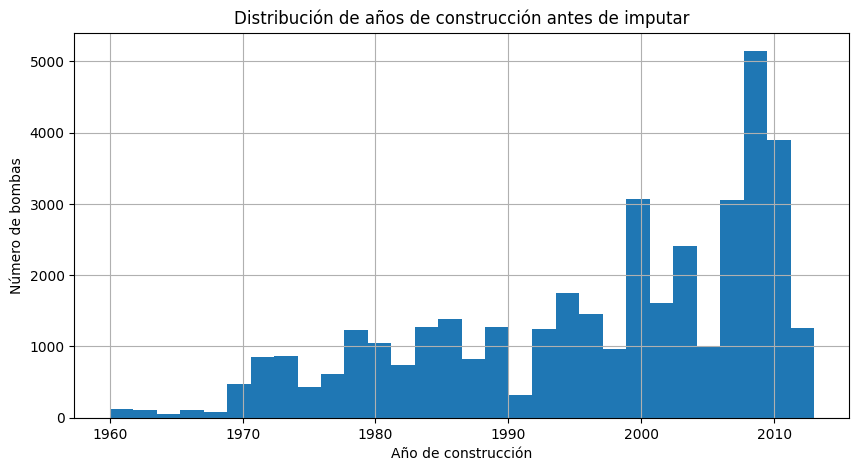

In [59]:
print("Año mínimo:", df_imp['construction_year'].min())
print("Año máximo:", df_imp['construction_year'].max())

df_imp['construction_year'].hist(bins=30, figsize=(10,5))
plt.xlabel("Año de construcción")
plt.ylabel("Número de bombas")
plt.title("Distribución de años de construcción antes de imputar")
plt.show()

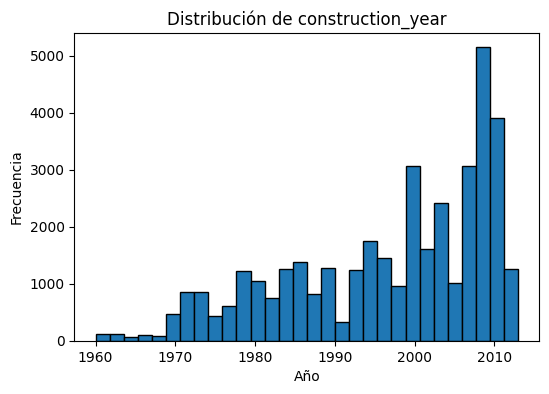

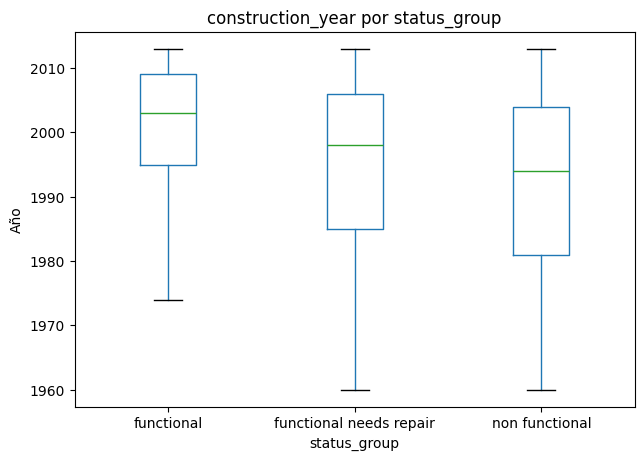

In [134]:

# 1) Histograma de construction_year
pd.to_numeric(df['construction_year'], errors='coerce').dropna().plot(
    kind='hist', bins=30, edgecolor='black', figsize=(6,4)
)
plt.title('Distribución de construction_year')
plt.xlabel('Año'); plt.ylabel('Frecuencia')
plt.show()

# 2) Boxplot de construction_year por status_group
(df[['construction_year','status_group']]
 .assign(construction_year=pd.to_numeric(df['construction_year'], errors='coerce'))
 .dropna(subset=['construction_year'])
 .boxplot(column='construction_year', by='status_group', grid=False, showfliers=False, figsize=(7,5))
)
plt.title('construction_year por status_group'); plt.suptitle('')
plt.xlabel('status_group'); plt.ylabel('Año')
plt.show()



In [61]:
#creamos base antes de nada para oder comparar
df_imp2 = df_imp.copy()

# Extraer el año de la fecha de registro
df_imp2['date_recorded'] = pd.to_datetime(df_imp2['date_recorded'], errors='coerce')
df_imp2['recorded_year'] = df_imp2['date_recorded'].dt.year

# Creamos base binaria de si tenia el año de construccion o le faltaba
df_imp2['was_missing_year'] = (df_imp2['construction_year'].isna()) | (df_imp2['construction_year'] == 0)

# Sustituir 0 por NaN en construction_year
df_imp2['construction_year'] = df_imp2['construction_year'].replace(0, np.nan)

# --- Imputación con la mediana de cada distrito ---
if 'district_code' in df_imp2.columns:
    med_by_district = df_imp2.groupby('district_code')['construction_year'].transform('median')
    df_imp2['construction_year'] = df_imp2['construction_year'].fillna(med_by_district)

# Si aún queda algún NaN, rellenar con la mediana global
df_imp2['construction_year'] = df_imp2['construction_year'].fillna(df_imp2['construction_year'].median())

# Crear columna antigüedad de la bomba en el momento del checkeo
df_imp2['pump_age'] = df_imp2['recorded_year'] - df_imp2['construction_year']

# ---- Chequeos rápidos ----
print("NaN en construction_year:", df_imp2['construction_year'].isna().sum())
print("Total was_missing_year=True:", df_imp2['was_missing_year'].sum())
print("Rango construction_year:", int(df_imp2['construction_year'].min()), "-", int(df_imp['construction_year'].max()))
print("Mediana pump_age:", df_imp2['pump_age'].median())
print(df_imp2['pump_age'])


NaN en construction_year: 0
Total was_missing_year=True: 20709
Rango construction_year: 1960 - 2013
Mediana pump_age: 11.0
0        12.0
1         3.0
2         4.0
3        27.0
4        11.0
         ... 
59395    14.0
59396    15.0
59397     8.0
59398    11.0
59399     9.0
Name: pump_age, Length: 59400, dtype: float64


In [ ]:
#distribucion años de construccion despues de imputar y de "pump age"

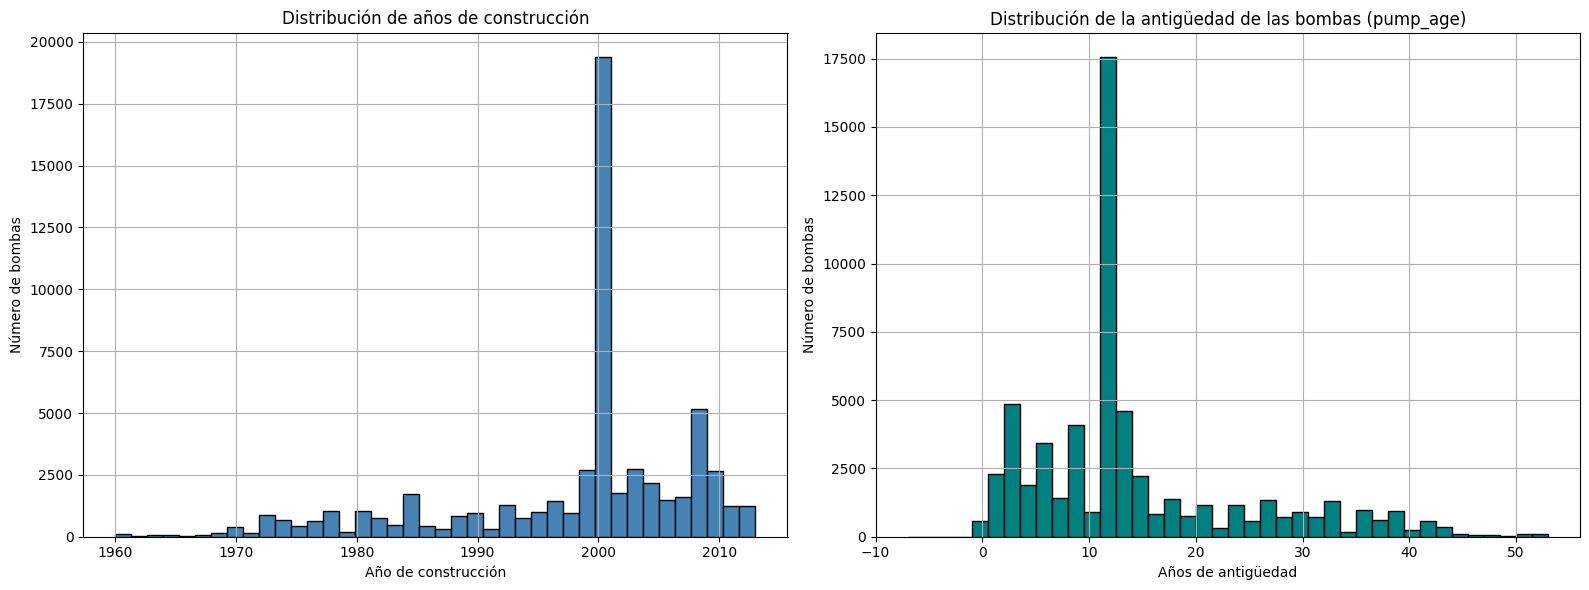

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- 1) Distribución de años de construcción ---
df_imp2['construction_year'].hist(bins=40, color='steelblue', edgecolor='black', ax=axes[0])
axes[0].set_title("Distribución de años de construcción")
axes[0].set_xlabel("Año de construcción")
axes[0].set_ylabel("Número de bombas")

# --- 2) Distribución de antigüedad ---
df_imp2['pump_age'].hist(bins=40, color='teal', edgecolor='black', ax=axes[1])
axes[1].set_title("Distribución de la antigüedad de las bombas (pump_age)")
axes[1].set_xlabel("Años de antigüedad")
axes[1].set_ylabel("Número de bombas")

plt.tight_layout()
plt.show()

# Este nuevo intento de imputar los Nan tambien polariza en exceso los resultados ya que casi todos recaen en la misma fecha, exactamente igual que con el intento anterior, dejamos de momento los Nan y vemos despues segun el modelo que vayamos a usar
# de momento tenemos creada la columna pump_age y la binaria sobre si hay o no hay construcion_data

In [ ]:
# scheme name y scheme management son iguales, vamos a compararlas para estar seguros de que lo son, y rellenar los huecos de la que le faltan 
### menos con la info de la otra si lo tiene o con la moda si no

In [63]:
print("Valores no nulos en scheme_name:", df_imp['scheme_name'].notna().sum())
print("Valores no nulos en scheme_management:", df_imp['scheme_management'].notna().sum())

Valores no nulos en scheme_name: 30590
Valores no nulos en scheme_management: 55522


In [71]:
print(df_imp['scheme_name'])
print(df_imp['scheme_management'])
      

0                              Roman
1                                NaN
2        Nyumba ya mungu pipe scheme
3                                NaN
4                                NaN
                    ...             
59395         Losaa Kia water supply
59396    Ikondo electrical water sch
59397                            NaN
59398                            NaN
59399                            NaN
Name: scheme_name, Length: 59400, dtype: object
0                VWC
1              Other
2                VWC
3                VWC
4                NaN
            ...     
59395    Water Board
59396            VWC
59397            VWC
59398            VWC
59399            VWC
Name: scheme_management, Length: 59400, dtype: object


In [67]:
#en reaidad no son iguales pero vamos a quedarnos con scheme_management, rellenando los huevos con scheme_name,
#ya que es la que tiene cardinalidad mas baja y mayor numero de datos validos, para realizar una diferenciacion 
#en este campo si es interesante para el modelo ya sera suficienta

In [72]:
# rellenamos los huecos de scheme_management, con scheme_name

df_imp['scheme_management'] = df_imp['scheme_management'].fillna(df_imp['scheme_name'])

In [74]:
# comprobamos los Nan que quedan

still_nan= df_imp['scheme_management'].isna().sum()
print(still_nan)

3572


In [75]:
#rellenamos con la moda

moda_sm = df_imp['scheme_management'].mode(dropna=True)[0]
df_imp['scheme_management'] = df_imp['scheme_management'].fillna(moda_sm)

In [76]:
still_nan= df_imp['scheme_management'].isna().sum()
print(still_nan)

0


In [135]:
#normalizamos columna

def normalize_series(s):
    s = s.astype(str).str.lower().str.strip()
    s = s.str.replace(r'[^a-z0-9 ]', '', regex=True)   # quita símbolos
    s = s.str.replace(r'\s+', ' ', regex=True)         # colapsa espacios
    s = s.replace({'nan': np.nan, 'none': np.nan, 'null': np.nan, '': np.nan, '0': np.nan})
    return s

df_imp['scheme_management'] = normalize_series(df_imp['scheme_management']).fillna('unknown')


print(df_imp['scheme_management'])

0                vwc
1              other
2                vwc
3                vwc
4                vwc
            ...     
59395    water board
59396            vwc
59397            vwc
59398            vwc
59399            vwc
Name: scheme_management, Length: 59400, dtype: object


In [ ]:
#agrupamos categorias raras en "other" para reducir cardinalidad

In [79]:
# Frecuencia de cada categoría
freq = df_imp['scheme_management'].value_counts()

# Definir umbral
umbral = 100
categorias_comunes = freq[freq >= umbral].index

# Reemplazar valores poco frecuentes por 'other'
df_imp['scheme_management'] = df_imp['scheme_management'].apply(
    lambda x: x if x in categorias_comunes else 'other')

In [82]:
otros = (df_imp['scheme_management'] == 'other').sum()
print(otros)
print(categorias_comunes)

1241
Index(['vwc', 'wug', 'water authority', 'wua', 'water board', 'parastatal',
       'private operator', 'company', 'other'],
      dtype='object', name='scheme_management')


In [ ]:
# en el caso de "funder" e "installer" es un poco lo mismo, vamos a elegir segun cardinalidad pq los missing son similares, 
#rellenar con la otra columna, normalizar y agrupar categorias

In [83]:
# 1. Cardinalidad
card_installer = df_imp['installer'].nunique(dropna=True)
card_funder = df_imp['funder'].nunique(dropna=True)

print(f"Cardinalidad installer: {card_installer}")
print(f"Cardinalidad funder: {card_funder}")

Cardinalidad installer: 2144
Cardinalidad funder: 1896


In [ ]:
# imputamos los huevos de Funder con Installer pq tiene menor cardinalidad

In [88]:
# 1. Definir columnas
main_col = 'funder'
aux_col = 'installer'

# 2. Rellenar huecos
df_imp[main_col] = df_imp[main_col].fillna(df_imp[aux_col])

moda_mc = df_imp[main_col].mode(dropna=True)[0]
df_imp[main_col] = df_imp[main_col].fillna(moda_mc)

#comprovamos Nan

still_nan= df_imp[main_col].isna().sum()
print(still_nan)



0


In [ ]:
# normalizamos columna

In [89]:
df_imp[main_col] = normalize_series(df_imp[main_col])

print(df_imp[main_col])

0                  roman
1                  other
2                  other
3                 unicef
4                  other
              ...       
59395    germany republi
59396              other
59397                nan
59398              other
59399         world bank
Name: funder, Length: 59400, dtype: object


In [90]:
still_nan= df_imp[main_col].isna().sum()
print(still_nan)

0


In [107]:

# 1. Limpiar texto
df_imp['funder'] = (df_imp['funder']
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r'[^a-z0-9 ]', '', regex=True)   
    .str.replace(r'\s+', ' ', regex=True))

# 2. Convertir valores basura en NaN
df_imp['funder'].replace(['nan', 'none', 'null', '', '0'], np.nan, inplace=True)

# 3. Reemplazar NaN por 'unknown'
df_imp['funder'].fillna('unknown', inplace=True)

# 4. Agrupar categorías poco frecuentes en 'other'
umbral = 500  # frecuencia mínima
freq = df_imp['funder'].value_counts()
categorias_comunes = freq[freq >= umbral].index

df_imp.loc[~df_imp['funder'].isin(categorias_comunes), 'funder'] = 'other'

print(df_imp['funder'].value_counts().head(20))

funder
other                     26986
government of tanzania     9084
unknown                    4361
danida                     3114
hesawa                     2203
rwssp                      1375
world bank                 1349
kkkt                       1287
world vision               1247
unicef                     1058
tasaf                       877
district council            843
dhv                         829
private individual          826
dwsp                        811
norad                       765
germany republi             610
tcrs                        602
ministry of water           590
water                       583
Name: count, dtype: int64


C:\Users\sgalc\AppData\Local\Temp\ipykernel_15020\1666474665.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imp['funder'].replace(['nan', 'none', 'null', '', '0'], np.nan, inplace=True)


In [ ]:
#volvemos a comprobar Nan

In [108]:
nan_cols = df_imp.isna().sum()
nan_cols = nan_cols[nan_cols > 0].sort_values(ascending=False)

print("Columnas con NaN y su cantidad:")
print(nan_cols)

Columnas con NaN y su cantidad:
scheme_name          28810
construction_year    20709
installer             3658
public_meeting        3334
permit                3056
subvillage             371
wpt_name                 2
dtype: int64


In [110]:
# public_meeting y permit → binario con -1 como "desconocido"
for col in ['public_meeting', 'permit']:
    df_imp[col] = df_imp[col].map({True: 1, False: 0})
    df_imp[col] = df_imp[col].fillna(-1)

# subvillage y wpt_name → texto limpio, rarezas → "other", nulos → "unknown"
for col, umbral in [('subvillage', 200), ('wpt_name', 50)]:
    df_imp[col] = df_imp[col].astype(str).str.lower().str.strip()
    df_imp[col] = df_imp[col].replace(['nan', 'none', 'null', '', '0'], np.nan)
    df_imp[col] = df_imp[col].fillna('unknown')

    # agrupar categorías poco frecuentes
    freq = df_imp[col].value_counts()
    comunes = freq[freq >= umbral].index
    df_imp.loc[~df_imp[col].isin(comunes), col] = 'other'

In [111]:
nan_cols = df_imp.isna().sum()
nan_cols = nan_cols[nan_cols > 0].sort_values(ascending=False)

print("Columnas con NaN y su cantidad:")
print(nan_cols)

Columnas con NaN y su cantidad:
scheme_name          28810
construction_year    20709
installer             3658
dtype: int64


In [ ]:
#solo quedaba por decidir que hacer con construction year, dado que hay muchos valores desconocidos y todo lo que hemos intentado 
#polariza muchisimo los resultados (media, mediana, calculos con la fecha que se reviso..)
#VOY A CATEGORIZARLA EN MUY VIEJA, VIEJA, RECIENTE MUY RECIENTE Y DESCONOCIDO

In [112]:
def categorizar_construction_year(x):
    if pd.isna(x) or x == 0:
        return 'unknown'
    elif x < 1970:
        return 'muy_vieja'
    elif x < 1990:
        return 'vieja'
    elif x < 2010:
        return 'reciente'
    else:
        return 'muy_reciente'

df_imp['construction_year_cat'] = df_imp['construction_year'].apply(categorizar_construction_year)

# Ver distribución
print(df_imp['construction_year_cat'].value_counts())

construction_year_cat
reciente        23008
unknown         20709
vieja            9984
muy_reciente     5161
muy_vieja         538
Name: count, dtype: int64


In [ ]:
#hacemos un apartado con las columnas descartadas de momento y una con todas las que si vamos a usar y que ya han sido limpiadas
#retiramos columnas redundantes y columnas con elevada cardinalidad que no aportan info real sobre la bomba 

In [147]:
cols_descartadas = ['scheme_name', 'installer', 'wpt_name','num_private','subvillage', 'region_code','public_meeting',
                    'recorded_by','region','basin','lga','payment','water_quality','quantity','source', 'source_type','waterpoint_type','ward',
                    'management','management_group', 'longitude', 'latitude',]
df_removed = df_imp[cols_descartadas].copy()
df_final = df_imp.drop(columns=cols_descartadas)
print("Columnas finales:", df_final.columns.tolist())
print("Columnas guardadas aparte:", df_removed.columns.tolist())
df_final.head()


Columnas finales: ['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'district_code', 'population', 'scheme_management', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'payment_type', 'quality_group', 'quantity_group', 'source_class', 'waterpoint_type_group', 'status_group', 'construction_year_cat']
Columnas guardadas aparte: ['scheme_name', 'installer', 'wpt_name', 'num_private', 'subvillage', 'region_code', 'public_meeting', 'recorded_by', 'region', 'basin', 'lga', 'payment', 'water_quality', 'quantity', 'source', 'source_type', 'waterpoint_type', 'ward', 'management', 'management_group', 'longitude', 'latitude']


,id,amount_tsh,date_recorded,funder,gps_height,district_code,population,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,construction_year_cat
0,69572,6000.0,2011-03-14,other,1390.000000,5,109,vwc,-1.0,1999.0,gravity,gravity,gravity,annually,good,enough,groundwater,communal standpipe,functional,reciente
1,8776,0.0,2013-03-06,other,1399.000000,2,280,other,-1.0,2010.0,gravity,gravity,gravity,never pay,good,insufficient,surface,communal standpipe,functional,muy_reciente
2,34310,25.0,2013-02-25,other,686.000000,4,250,vwc,-1.0,2009.0,gravity,gravity,gravity,per bucket,good,enough,surface,communal standpipe,functional,reciente
3,67743,0.0,2013-01-28,unicef,263.000000,63,58,vwc,-1.0,1986.0,submersible,submersible,submersible,never pay,good,dry,groundwater,communal standpipe,non functional,vieja
4,19728,0.0,2011-07-13,other,998.432498,1,0,vwc,-1.0,NaN,gravity,gravity,gravity,never pay,good,seasonal,surface,communal standpipe,functional,unknown


In [ ]:
#comprobamos variables y shap de la base de datos limpia antes del train

In [157]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Usamos tu training limpio con la etiqueta
df = df_final.copy()

# 1) Derivar año/mes de la fecha y quitar la fecha cruda
if 'date_recorded' in df.columns:
    df['date_recorded'] = pd.to_datetime(df['date_recorded'], errors='coerce')
    df['year_recorded']  = df['date_recorded'].dt.year
    df['month_recorded'] = df['date_recorded'].dt.month
    df = df.drop(columns=['date_recorded'])

# 2) Separar variables y target
y = df['status_group']
X = df.drop(columns=['status_group'])

# 3) Detectar variales numéricas y categóricas
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]

# 4) Preprocesador (imputación + OneHot para categóricas)
pre = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_cols),
        ('cat', Pipeline(steps=[
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_cols),],remainder='drop')

print("X shape:", X.shape)
print("Numéricas:", len(num_cols), " | Categóricas:", len(cat_cols))

X shape: (59400, 20)
Numéricas: 9  | Categóricas: 11


In [ ]:
# TRAIN RANDOM FOREST, dado que tenemos variables categoricas y numerias y cardinalidad tirando a alt

Accuracy: 0.7785
F1 macro: 0.6438
F1 weighted: 0.7715

Classification report:
                          precision    recall  f1-score   support

             functional       0.79      0.86      0.82      6452
functional needs repair       0.42      0.27      0.33       863
         non functional       0.80      0.76      0.78      4565

               accuracy                           0.78     11880
              macro avg       0.67      0.63      0.64     11880
           weighted avg       0.77      0.78      0.77     11880



<Figure size 600x500 with 0 Axes>

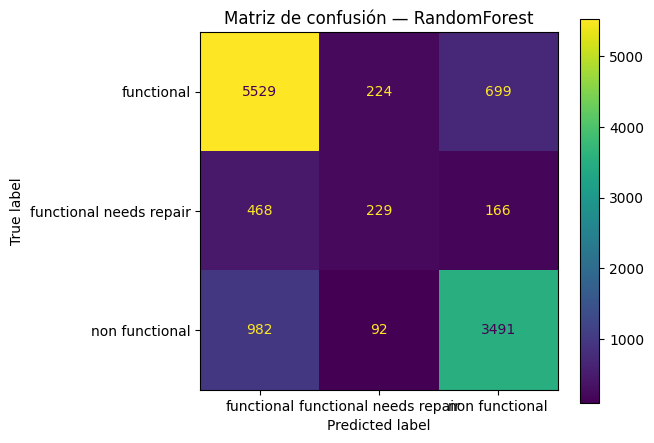

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split estratificado
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

# Pipeline (preprocesador 'pre' ya definido en el paso anterior)
clf = Pipeline(steps=[
    ('prep', pre),
    ('model', RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced_subsample' ))])

# Entrenar
clf.fit(X_tr, y_tr)

# Predicción y métricas
y_pred = clf.predict(X_te)
print("Accuracy:", round(accuracy_score(y_te, y_pred), 4))
print("F1 macro:", round(f1_score(y_te, y_pred, average='macro'), 4))
print("F1 weighted:", round(f1_score(y_te, y_pred, average='weighted'), 4))
print("\nClassification report:\n", classification_report(y_te, y_pred))
# Matriz de confusión
plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_predictions(y_te, y_pred)
plt.title("Matriz de confusión — RandomForest")
plt.tight_layout()
plt.show()

In [ ]:
#El modelo acierta bien en functional y non functional.

#Falla en needs repair (recall 0.27): muchos casos que necesitan reparación están siendo clasificados como otra cosa, functional ppalmente.

#F1 macro es más bajo que accuracy porque penaliza este mal desempeño en la clase minoritaria

In [ ]:
###### AUMENTAMOS EL TAMAÑO DEL BOSQUE A 500, esperamos más de estabilidad (menos varianza) y a lo mejor mejor accuracy,
# No cambiamos el preprocesado ni añadimos regularización extra##########

In [159]:


clf = Pipeline([
    ('prep', pre),  
    ('model', RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced_subsample'))])

clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_te)
print(f"Accuracy: {accuracy_score(y_te, y_pred):.4f}")
print(f"F1 macro: {f1_score(y_te, y_pred, average='macro'):.4f}")
print("\nReporte (predicción normal):\n", classification_report(y_te, y_pred))

Accuracy: 0.7795
F1 macro: 0.6462

Reporte (predicción normal):
                          precision    recall  f1-score   support

             functional       0.79      0.86      0.82      6452
functional needs repair       0.42      0.27      0.33       863
         non functional       0.80      0.77      0.78      4565

               accuracy                           0.78     11880
              macro avg       0.67      0.63      0.65     11880
           weighted avg       0.77      0.78      0.77     11880



In [ ]:
###Subimos RECALL de "needs repair"

In [160]:
proba  = clf.predict_proba(X_te)
labels = clf.named_steps['model'].classes_.tolist()
idx_nr = labels.index('functional needs repair')

t = 0.30  # ajusta entre 0.25–0.35 si quieres
argmax_labels = np.array(labels, dtype=object)[proba.argmax(axis=1)]

y_pred_thr = argmax_labels.copy()
y_pred_thr[proba[:, idx_nr] >= t] = 'functional needs repair'

print(f"\nReporte con umbral t={t:.2f} para 'needs repair':\n",
      classification_report(y_te, y_pred_thr))


Reporte con umbral t=0.30 para 'needs repair':
                          precision    recall  f1-score   support

             functional       0.80      0.83      0.81      6452
functional needs repair       0.38      0.37      0.37       863
         non functional       0.81      0.76      0.78      4565

               accuracy                           0.77     11880
              macro avg       0.66      0.65      0.66     11880
           weighted avg       0.77      0.77      0.77     11880



In [ ]:
### Probamos varios umbrales y elegimos el mejor #####

In [161]:
proba  = clf.predict_proba(X_te)
labels = clf.named_steps['model'].classes_.tolist()
idx_nr = labels.index('functional needs repair')

def predict_with_t(proba, idx, t, labels):
    arg = proba.argmax(axis=1)
    out = np.array(labels, dtype=object)[arg]
    out[proba[:, idx] >= t] = 'functional needs repair'
    return out

cand = np.arange(0.20, 0.41, 0.02)  
rows = []
for t in cand:
    y_hat = predict_with_t(proba, idx_nr, t, labels)
    rows.append({'t': t, 'f1_macro': f1_score(y_te, y_hat, average='macro'),
                      'f1_nr':    f1_score(y_te, y_hat, labels=['functional needs repair'], average='macro')})
scores = pd.DataFrame(rows).sort_values(['f1_nr','f1_macro'], ascending=False)
print(scores.to_string(index=False))
best_t = float(scores.iloc[0]['t'])
print("Mejor t por F1 de 'needs repair':", best_t)

   t  f1_macro    f1_nr
0.22  0.658610 0.387635
0.20  0.655600 0.383754
0.26  0.658873 0.382749
0.24  0.657680 0.382139
0.28  0.657606 0.376975
0.30  0.656063 0.371412
0.32  0.655602 0.367718
0.34  0.655332 0.364096
0.36  0.654589 0.359477
0.38  0.653929 0.356237
0.40  0.650385 0.345528
Mejor t por F1 de 'needs repair': 0.22


In [ ]:
#Reentrenar el pipeline completo con TODO el training y t = 0.22 y sin 'id' pq me daba error
#introduzco "construction_year" ademas de 'contruction_year_cat' (categorizada)

In [163]:
df_all = df_final.copy()

# construction_year numérico (0 -> NaN)
df_all['construction_year'] = pd.to_numeric(df_all['construction_year'], errors='coerce').replace(0, np.nan)

# year/month de date_recorded 
if 'date_recorded' in df_all.columns:
    df_all['date_recorded'] = pd.to_datetime(df_all['date_recorded'], errors='coerce')
    df_all['year_recorded']  = df_all['date_recorded'].dt.year
    df_all['month_recorded'] = df_all['date_recorded'].dt.month
    df_all = df_all.drop(columns=['date_recorded'])

# 2) y / X sin 'status_group' ni 'id'
y = df_all['status_group']
X = df_all.drop(columns=['status_group', 'id'], errors='ignore')

# 3) RECONSTRUIR pre y clf con estas columnas
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]

pre = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_cols),
        ('cat', Pipeline(steps=[
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols),
    ],
    remainder='drop'
)

clf = Pipeline(steps=[
    ('prep', pre),
    ('model', RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced_subsample'
    ))
])

# 4) Entrenar
clf.fit(X, y)

print("OK: modelo entrenado con", len(num_cols), "num y", len(cat_cols), "cat.")

OK: modelo entrenado con 8 num y 11 cat.


In [164]:
# 1) columnas usadas en el fit 
feature_cols = X.columns.tolist()



In [165]:
# 2) cargar test limpio con id
base = Path(r"C:\Users\sgalc\OneDrive\Escritorio\Proyectos y documentos - Data Analist and BI\entorno_python\env_ML\data base")
test = pd.read_csv(base / "test_final_con_id.csv")
id_test = test['id'].copy()
X_test  = test.drop(columns=['id']).copy()

In [166]:
# 3) derivar year/month SOLO si existe date_recorded
if 'date_recorded' in X_test.columns:
    X_test['date_recorded'] = pd.to_datetime(X_test['date_recorded'], errors='coerce')
    X_test['year_recorded']  = X_test['date_recorded'].dt.year
    X_test['month_recorded'] = X_test['date_recorded'].dt.month
    X_test = X_test.drop(columns=['date_recorded'])

In [167]:

# 4) alinear exactamente las columnas del fit
X_test = X_test.reindex(columns=feature_cols, fill_value=np.nan)

In [169]:
# 5) predicción con umbral t=0.22 para "functional needs repair"
t = 0.22
proba  = clf.predict_proba(X_test)
labels = clf.named_steps['model'].classes_.tolist()
idx_nr = labels.index('functional needs repair')

argmax_labels = np.array(labels, dtype=object)[proba.argmax(axis=1)]
y_pred_test   = argmax_labels.copy()
y_pred_test[proba[:, idx_nr] >= t] = 'functional needs repair'

In [170]:
# 6) guardar submission
submission = pd.DataFrame({'id': id_test, 'status_group': y_pred_test})
out_path = base / "submission_random_forest_t022.csv"
submission.to_csv(out_path, index=False)
print("Submission guardada en:", out_path)
print(submission['status_group'].value_counts())

Submission guardada en: C:\Users\sgalc\OneDrive\Escritorio\Proyectos y documentos - Data Analist and BI\entorno_python\env_ML\data base\submission_random_forest_t022.csv
status_group
functional                 7612
non functional             5074
functional needs repair    2164
Name: count, dtype: int64


In [ ]:
######Best score
0.7327
Current rank
#6954########

In [ ]:
######  QUITAMOS EL UMBRAL PQ UEDE PENALIZAR EL ACCURACY #####

In [171]:
base = Path(r"C:\Users\sgalc\OneDrive\Escritorio\Proyectos y documentos - Data Analist and BI\entorno_python\env_ML\data base")

test = pd.read_csv(base / "test_final_con_id.csv")
id_test = test['id'].copy()
X_test  = test.drop(columns=['id']).copy()

# Derivar year/month (igual que en train)
if 'date_recorded' in X_test.columns:
    X_test['date_recorded'] = pd.to_datetime(X_test['date_recorded'], errors='coerce')
    X_test['year_recorded']  = X_test['date_recorded'].dt.year
    X_test['month_recorded'] = X_test['date_recorded'].dt.month
    X_test = X_test.drop(columns=['date_recorded'])

# Alinear columnas a las usadas en el fit
X_test = X_test.reindex(columns=feature_cols, fill_value=np.nan)

# Predicción normal (argmax)
proba_te = clf.predict_proba(X_test)
labels   = clf.named_steps['model'].classes_.tolist()
y_pred_argmax = np.array(labels, dtype=object)[proba_te.argmax(axis=1)]

sub_argmax = pd.DataFrame({'id': id_test, 'status_group': y_pred_argmax})
sub_argmax.to_csv(base / "submission_rf_argmax.csv", index=False)
print(" Guardada: submission_rf_argmax.csv")

 Guardada: submission_rf_argmax.csv


In [ ]:
######Best score
0.7694
Current rank
#6510#########

In [ ]:
##### RANDOM FOREST SIN CLASS WEIGHT ######
### SUBIENDO ARBOLES A 600 TAMBIEN ####

In [175]:
# --- TRAIN (reconstruimos preprocesado sobre X actual) ---
df_all = df_final.copy()
if 'date_recorded' in df_all.columns:
    df_all['date_recorded'] = pd.to_datetime(df_all['date_recorded'], errors='coerce')
    df_all['year_recorded']  = df_all['date_recorded'].dt.year
    df_all['month_recorded'] = df_all['date_recorded'].dt.month
    df_all = df_all.drop(columns=['date_recorded'])

y = df_all['status_group']
X = df_all.drop(columns=['status_group','id'], errors='ignore')
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]

pre = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                      ('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_cols),
])

rf_plain = RandomForestClassifier(
    n_estimators=600, random_state=42, n_jobs=-1, class_weight=None
)
clf_plain = Pipeline([('prep', pre), ('model', rf_plain)])
clf_plain.fit(X, y)

# --- TEST + submission (argmax) ---
base = Path(r"C:\Users\sgalc\OneDrive\Escritorio\Proyectos y documentos - Data Analist and BI\entorno_python\env_ML\data base")
test = pd.read_csv(base / "test_final_con_id.csv")
id_test = test['id'].copy()
X_test  = test.drop(columns=['id']).copy()
if 'date_recorded' in X_test.columns:
    X_test['date_recorded'] = pd.to_datetime(X_test['date_recorded'], errors='coerce')
    X_test['year_recorded']  = X_test['date_recorded'].dt.year
    X_test['month_recorded'] = X_test['date_recorded'].dt.month
    X_test = X_test.drop(columns=['date_recorded'])
X_test = X_test.reindex(columns=X.columns, fill_value=np.nan)
y_pred = clf_plain.predict(X_test)
pd.DataFrame({'id': id_test, 'status_group': y_pred}).to_csv(
    base / "submission_rf_argmax_plain.csv", index=False
)
print("Guardada: submission_rf_argmax_plain.csv")



Guardada: submission_rf_argmax_plain.csv


In [ ]:
###Best score
0.7867
Current rank
#6053 ###

In [ ]:
####voy a revisar qutando y poniendo columnas como mejora el resultado####

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

df_all = df_final.copy()  
y = df_all['status_group']
REMOVER = ['funder', 'extraction_type', 'extraction_type_group',] 

USE = [c for c in df_all.columns if c not in (['status_group','id'] + REMOVER)]
X = df_all[USE]

num_cols = [c for c in USE if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in USE if c not in num_cols]

pre = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols),])

clf = Pipeline([
    ('prep', pre),
    ('model', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1))])


X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)

print("Columnas usadas:", len(USE))
print(f"Accuracy:  {accuracy_score(y_te, y_pred):.4f}")
print(f"F1 macro:  {f1_score(y_te, y_pred, average='macro'):.4f}")


USE_cols_for_test = USE[:]

Columnas usadas: 16
Accuracy:  0.7870
F1 macro:  0.6595


In [ ]:
###Columnas finales: ['id', 'amount_tsh', 'date_recorded', 'gps_height', 'district_code', 'population', 'scheme_management', 'permit', 
'construction_year', 'extraction_type_class', 'payment_type', 'quality_group', 'quantity_group', 
'source_class', 'waterpoint_type_group', 'status_group', 'construction_year_cat']

###Columnas guardadas aparte: ['scheme_name', 'installer', 'funder', 'wpt_name', 'num_private', 'subvillage', 'region_code', 'public_meeting', 
'recorded_by', 'extraction_type', 'extraction_type_group', 'region', 'basin', 'lga', 'payment', 'water_quality', 'quantity', 'source', 'source_type', 
'waterpoint_type', 'ward', 'management', 'management_group', 'longitude', 'latitude']

In [ ]:
### WORST RESULT: #REMOVER = ['funder', 'extraction_type', 'extraction_type_group', 'payment_type', 'scheme_management'] 

In [ ]:
Columnas usadas: 14
Accuracy:  0.7806
F1 macro:  0.6446

In [ ]:
### WORST RESULT: #REMOVER = ['funder', 'extraction_type', 'extraction_type_group', 'payment_type']

In [ ]:
Columnas usadas: 15
Accuracy:  0.7833
F1 macro:  0.6505

In [ ]:
### Slightly better resut =  #REMOVER = ['funder', 'extraction_type', 'extraction_type_group']

In [ ]:
Columnas usadas: 16
Accuracy:  0.7870
F1 macro:  0.6595

In [ ]:
### probamos aumentando el numero de arboles, que antes funciono

In [185]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score

df = df_final.copy()
y  = df['status_group']

# quitamos columnas que ya hemos visto no aportan
REMOVER = ['funder', 'extraction_type', 'extraction_type_group']  # "lean"
USE = [c for c in df.columns if c not in (['status_group','id'] + REMOVER)]
X = df[USE]

# prepro mínimo
num_cols = [c for c in USE if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in USE if c not in num_cols]
prep = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                      ('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_cols),])

# aumentamos arboles en modelo
modelo = ExtraTreesClassifier(
    n_estimators=700,      
    min_samples_leaf=2,    
    max_features='sqrt',   
    random_state=42, n_jobs=-1)

clf = Pipeline([('prep', prep), ('model', modelo)])

#chequeamos
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf.fit(Xtr, ytr)
yp = clf.predict(Xte)
print("Cols usadas:", len(USE))
print(f"Accuracy:  {accuracy_score(yte, yp):.4f}")
print(f"F1 macro:  {f1_score(yte, yp, average='macro'):.4f}")

Cols usadas: 16
Accuracy:  0.7830
F1 macro:  0.6145


In [ ]:
### peor resutado

In [ ]:
### probamos modelos variantes del randomforest con las columnas que ya decidimos quitar

In [ ]:
#### igual o peor resultado, me quedo con el modelo de antes, Modelo: RandomForest 500 árboles, sin class_weight,
#quitando ['funder', 'extraction_type', 'extraction_type_group']

In [194]:
# 1) Parto los datos en train y test (80/20)
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2) Lista de modelos a probar 
variants = {"rf_base": RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1),
            "rf_reg" : RandomForestClassifier(n_estimators=600, max_depth=18, min_samples_leaf=3,
                                      random_state=42, n_jobs=-1),
            "rf_log2": RandomForestClassifier(n_estimators=600, max_features='log2',
                                      random_state=42, n_jobs=-1),}

# 3) Bucle: entreno, predigo y mido
from sklearn.metrics import accuracy_score, f1_score
best_name, best_acc, best_clf = None, -1, None

for name, model in variants.items():
    
    clf = Pipeline([('prep', prep), ('model', model)])  
    clf.fit(Xtr, ytr)               
    yp = clf.predict(Xte)           
    acc = accuracy_score(yte, yp)   
    f1m = f1_score(yte, yp, average='macro')  
    print(f"{name} -> acc={acc:.4f} | f1_macro={f1m:.4f}")

    
    if acc > best_acc:
        best_name, best_acc, best_clf = name, acc, clf

print(f"\nMejor modelo: {best_name} (accuracy={best_acc:.4f})")

rf_base -> acc=0.7870 | f1_macro=0.6595
rf_reg -> acc=0.7821 | f1_macro=0.6091
rf_log2 -> acc=0.7864 | f1_macro=0.6593

Mejor modelo: rf_base (accuracy=0.7870)


In [191]:

BASE_REMOVE = ['funder','extraction_type','extraction_type_group']

df = df_final.copy()
y  = df['status_group']
USE = [c for c in df.columns if c not in (['status_group','id'] + BASE_REMOVE)]

# --- X train 
X = df[USE].copy().replace({pd.NA: np.nan})
num_cols = [c for c in USE if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in USE if c not in num_cols]

pre = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                      ('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_cols),])

clf = Pipeline([('prep', pre),
                ('model', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1))])

# --- entrenar con TODO el train ---
clf.fit(X, y)

# --- preparar TEST y predecir (argmax) ---
base = Path(r"C:\Users\sgalc\OneDrive\Escritorio\Proyectos y documentos - Data Analist and BI\entorno_python\env_ML\data base")
test = pd.read_csv(base / "test_final_con_id.csv")
id_test = test['id'].copy()
X_test  = (test.drop(columns=['id'])
                .reindex(columns=USE, fill_value=np.nan)
                .replace({pd.NA: np.nan}))

y_pred = clf.predict(X_test)

# --- guardar submission ---
submission = pd.DataFrame({'id': id_test, 'status_group': y_pred})
out_path = base / "submission_rf_lean_argmax.csv"
submission.to_csv(out_path, index=False)
print("Submission guardada en:", out_path)

Submission guardada en: C:\Users\sgalc\OneDrive\Escritorio\Proyectos y documentos - Data Analist and BI\entorno_python\env_ML\data base\submission_rf_lean_argmax.csv


In [192]:
df_all = df_final.copy()
y = df_all['status_group']

REMOVER = ['funder', 'extraction_type', 'extraction_type_group']  
USE = [c for c in df_all.columns if c not in (['status_group','id'] + REMOVER)]
X = df_all[USE].copy()

num_cols = [c for c in USE if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in USE if c not in num_cols]

# ========== 2) Pipeline ==========
pre = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols),])

clf = Pipeline([
    ('prep', pre),
    ('model', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1))])

# ========== 3) EVALUACIÓN antes de submission ==========
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)

print("Columnas usadas:", len(USE))
print(f"Accuracy (val):  {accuracy_score(y_te, y_pred):.4f}")
print(f"F1 macro (val):  {f1_score(y_te, y_pred, average='macro'):.4f}")

# ========== 4) ENTRENAR en TODO el train ==========
clf.fit(X, y)

# ========== 5) PREDICCIONES TEST y SUBMISSION ==========
base = Path(r"C:\Users\sgalc\OneDrive\Escritorio\Proyectos y documentos - Data Analist and BI\entorno_python\env_ML\data base")
test = pd.read_csv(base / "test_final_con_id.csv")

id_test = test['id'].copy()
X_test  = test.drop(columns=['id']).copy()
# Alinear exactamente las columnas usadas
X_test = X_test.reindex(columns=USE, fill_value=np.nan)

# Predicción argmax
y_pred_test = clf.predict(X_test)

# Guardar submission
submission = pd.DataFrame({'id': id_test, 'status_group': y_pred_test})
out_path = base / "submission_rf_16cols_argmax.csv"
submission.to_csv(out_path, index=False)
print(" Submission guardada en:", out_path)

Columnas usadas: 16
Accuracy (val):  0.7870
F1 macro (val):  0.6595
 Submission guardada en: C:\Users\sgalc\OneDrive\Escritorio\Proyectos y documentos - Data Analist and BI\entorno_python\env_ML\data base\submission_rf_16cols_argmax.csv


In [193]:
df_all = df_final.copy()  
y = df_all['status_group']
REMOVER = ['funder', 'extraction_type', 'extraction_type_group',] 

USE = [c for c in df_all.columns if c not in (['status_group','id'] + REMOVER)]
X = df_all[USE]

num_cols = [c for c in USE if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in USE if c not in num_cols]

pre = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols),])

clf = Pipeline([
    ('prep', pre),
    ('model', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1))])


X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)

print("Columnas usadas:", len(USE))
print(f"Accuracy:  {accuracy_score(y_te, y_pred):.4f}")
print(f"F1 macro:  {f1_score(y_te, y_pred, average='macro'):.4f}")

submission = pd.DataFrame({'id': id_test, 'status_group': y_pred_test})
out_path = base / "submission_rf_16cols_argmax_final.csv"
submission.to_csv(out_path, index=False)
print(" Submission guardada en:", out_path)

Columnas usadas: 16
Accuracy:  0.7870
F1 macro:  0.6595
 Submission guardada en: C:\Users\sgalc\OneDrive\Escritorio\Proyectos y documentos - Data Analist and BI\entorno_python\env_ML\data base\submission_rf_16cols_argmax_final.csv
